# INFSCI 2415 (Tuesday) Final Project -- Zhimeng Luo, Xiaoyi Tian

## Team contact
    Zhimeng Luo (zhl123@pitt.edu)
    Xiaoyi Tian (xit33@pitt.edu)

## Introduction

51Job is one of the largest job-seeking platform in China. Ten-thousands opening positions from every cities in China were posted everyday. In this notebook, I will be analyzing '51 Job' dataset. The dataset was retrieved from Kaggle.com. link: https://www.kaggle.com/carrychang/job-information-for-it/metadata

## 1. Data processing

In [1]:
import re
import pandas as pd
import numpy as np
import statistics 
from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read the data set using pandas .read_excel() method
df_51job = pd.read_excel('51job.xlsx')
# print the top 5 row from the dataframe
# df_51job.head()

### Delete error rows

In [3]:
# delete error rows
for i, row in df_51job.iterrows():
    # find error rows
    if row['people_need'][-2:] == "发布":
        df_51job.drop(i, inplace=True)
    elif "省" in row['city']:
        df_51job.drop(i, inplace=True)
    elif not isinstance(row['salary'], str):
        df_51job.drop(i, inplace=True)

### Normalize number of people need and city names and salary

In [4]:
for i, row in df_51job.iterrows():
    # for city names
    df_51job.at[i, "city"] = row["city"].split("-")[0]
    # for people need
    num_people_need = row["people_need"]
    if num_people_need == "招若干人":
        df_51job.at[i, "people_need"] = np.nan
    else:
        df_51job.at[i, "people_need"] = int(num_people_need[1:-1])
    # for salary
    [_, number, unit] = re.split(r"([\d.-]+)", row["salary"])
    number_list = number.split("-")
    number_average = sum([float(i) for i in number_list])/len(number_list)
    unit_list = unit.split("/")
    if unit_list[0][0] == "元":
        salary = number_average
    elif unit_list[0][0] == "千":
        salary = number_average*1000
    elif unit_list[0][0] == "万":
        salary = number_average*10000

    if unit_list[1] == "小时":
        salary = salary*8*5*4*12
    elif unit_list[1] == "天":
        salary = salary*5*4*12
    elif unit_list[1] == "月":
        salary = salary*12
    elif unit_list[1] == "年":
        pass
    df_51job.at[i, "salary"] = salary
df_51job = df_51job.astype({"salary": float})

In [5]:
df_people_need = df_51job['people_need'].dropna()
people_need_median = statistics.median(df_people_need)
print("Median of people-needed is : % s " % (people_need_median))
# fill nan with median value
df_51job['people_need'].fillna(people_need_median, inplace=True)

Median of people-needed is : 2.0 


### Unique job list, city list, and degree list

In [6]:
#unique job area list
job_area_list = df_51job['company_area'].unique().tolist()
print(len(job_area_list))

57


In [7]:
# unique city list
city_list = df_51job['city'].unique().tolist()
print(len(city_list))

288


In [8]:
# degree list
degree_list = df_51job['edu'].unique().tolist()
print(degree_list)

['本科', '大专', '中专', '初中及以下', '高中', '中技', '硕士', '博士']


In [9]:
# working experience
workexp_list = df_51job['workingexp'].unique().tolist()
print(workexp_list)

['3-4年经验', '1年经验', '2年经验', '无工作经验', '5-7年经验', '10年以上经验', '8-9年经验']


### mean salary of different working experience by city

#### Beijing

In [10]:
df_beijing = df_51job[df_51job['city']=="北京"][["edu", "salary", "workingexp"]]

In [11]:
# mean salary of bachelor degree requirement in Beijing
df_beijing_1 = df_beijing[df_beijing["edu"]=="本科"]
df_beijing_1.groupby("workingexp")["salary"].median()

workingexp
10年以上经验    270000.0
1年经验       108000.0
2年经验       126000.0
3-4年经验     180000.0
5-7年经验     240000.0
8-9年经验     300000.0
无工作经验      108000.0
Name: salary, dtype: float64

In [12]:
# mean salary of master degree requirement in Beijing
df_beijing_2 = df_beijing[df_beijing["edu"]=="硕士"]
df_beijing_2.groupby("workingexp")["salary"].median()

workingexp
10年以上经验    144000.0
1年经验       270000.0
2年经验       150000.0
3-4年经验     210000.0
5-7年经验     345000.0
无工作经验      162000.0
Name: salary, dtype: float64

#### Shanghai

In [13]:
df_shanghai = df_51job[df_51job['city']=="上海"][["edu", "salary", "workingexp"]]

In [14]:
# mean salary of bachelor degree requirement
df_shanghai_1 = df_shanghai[df_shanghai["edu"]=="本科"]
df_shanghai_1.groupby("workingexp")["salary"].median()

workingexp
10年以上经验    390000.0
1年经验       108000.0
2年经验       138000.0
3-4年经验     180000.0
5-7年经验     240000.0
8-9年经验     300000.0
无工作经验      108000.0
Name: salary, dtype: float64

In [15]:
# mean salary of master degree requirement
df_shanghai_2 = df_shanghai[df_shanghai["edu"]=="硕士"]
df_shanghai_2.groupby("workingexp")["salary"].median()

workingexp
10年以上经验    495000.0
1年经验       150000.0
2年经验       210000.0
3-4年经验     275000.0
5-7年经验     241500.0
8-9年经验     650000.0
无工作经验      108000.0
Name: salary, dtype: float64

#### Guangzhou

In [16]:
df_guangzhou = df_51job[df_51job['city']=="广州"][["edu", "salary", "workingexp"]]

In [17]:
# mean salary of bachelor degree requirement
df_guangzhou_1 = df_guangzhou[df_guangzhou["edu"]=="本科"]
df_guangzhou_1.groupby("workingexp")["salary"].median()

workingexp
10年以上经验    425000.0
1年经验        90000.0
2年经验       108000.0
3-4年经验     144000.0
5-7年经验     210000.0
8-9年经验     249000.0
无工作经验       90000.0
Name: salary, dtype: float64

In [18]:
# mean salary of master degree requirement
df_guangzhou_2 = df_guangzhou[df_guangzhou["edu"]=="硕士"]
df_guangzhou_2.groupby("workingexp")["salary"].median()

workingexp
1年经验      192000.0
2年经验      269000.0
3-4年经验    420000.0
无工作经验     138000.0
Name: salary, dtype: float64

### sum up people need by city

In [19]:
# sum up people need by city
people_need_city_df = df_51job.groupby('city')['people_need']
people_need_city = dict(**people_need_city_df.apply(sum))

In [20]:
# sum up people need by city with degree requirement no lower than bachelor
people_need_city_df_high_degree = df_51job[(df_51job['edu']=="本科")|(df_51job['edu']=="硕士")|(df_51job['edu']=="博士")].groupby('city')['people_need']
people_need_city_high_degree = dict(**people_need_city_df_high_degree.apply(sum))

In [21]:
province_set = set(['河北', '山西', '吉林', '辽宁', '黑龙江', '陕西', '甘肃', '青海', '山东', '福建', '浙江', '台湾', '河南', '湖北', '湖南', '江西', '江苏', '安徽', '广东', '海南', '四川', '贵州', '云南'])

In [22]:
# calculate the ratio of high degree job by city
people_need_high_degree_ratio = {}
for city, people_need in people_need_city.items():
    if people_need>= 100 and city not in province_set:
        if city in people_need_city_high_degree:
            people_need_high_degree_ratio[city] = people_need_city_high_degree[city]/people_need
        else:
            people_need_high_degree_ratio[city] = 0

## 2. Figure

In [23]:
import pyecharts
from pyecharts.charts import Geo
from pyecharts import options as opts
from pyecharts.globals import ChartType, SymbolType
from pyecharts.datasets import COORDINATES
# cutoff is similarity threshold, 1 is exact same
COORDINATES.cutoff = 0.5

### 2.1 Main figure for high degree job ratio in China

In [24]:
geo1 = Geo(init_opts = opts.InitOpts(
#     width="2000px", height="1000px"
)) 
geo1.add_schema(maptype="china")
geo1.add("City ratio",
         [[k, float(v)*100] for k, v in people_need_high_degree_ratio.items()],
         type_=ChartType.EFFECT_SCATTER,
         blur_size=10,
         point_size=10,
        label_opts=opts.LabelOpts(is_show=False))
geo1.set_global_opts(
            visualmap_opts=opts.VisualMapOpts(
                max_=50,
                min_=0,
                range_text=["High", "Low"],
                is_calculable=True,
                range_color=["lightskyblue", "yellow", "red"],
            ),
            title_opts=opts.TitleOpts(title="high degree job ratio in China")
            )

In [25]:
geo1.render()
geo1.render_notebook()

### 2.2 Sub-figure for Job Salary and Working Experience

In [26]:
# make a new df to cululate the popularity of different company_area
guangzhou_salary_1 = pd.pivot_table(df_guangzhou_1, values='salary', index=['workingexp'],
                       aggfunc=np.median)
guangzhou_salary_2 = pd.pivot_table(df_guangzhou_2, values='salary', index=['workingexp'],
                       aggfunc=np.median)
#set pivot table to regular table(assign the current index 'company_area' to column and 
#add a new index) 
guangzhou_salary_1 = guangzhou_salary_1.reset_index()
guangzhou_salary_2 = guangzhou_salary_2.reset_index()
# combine bachelor and master's salary
guangzhou_salary_1['salary_Master'] = guangzhou_salary_2['salary']
guangzhou_salary_1['index'] = [10,1,2,3,5,7,0]
# sort by value
guangzhou_salary_1= guangzhou_salary_1.sort_values(by='index')
guangzhou_salary_1

,workingexp,salary,salary_Master,index
6,无工作经验,90000.0,NaN,0
1,1年经验,90000.0,269000.0,1
2,2年经验,108000.0,420000.0,2
3,3-4年经验,144000.0,138000.0,3
4,5-7年经验,210000.0,NaN,5
5,8-9年经验,249000.0,NaN,7
0,10年以上经验,425000.0,192000.0,10


Text(0, 0.5, 'Salary (CNY/Year)')

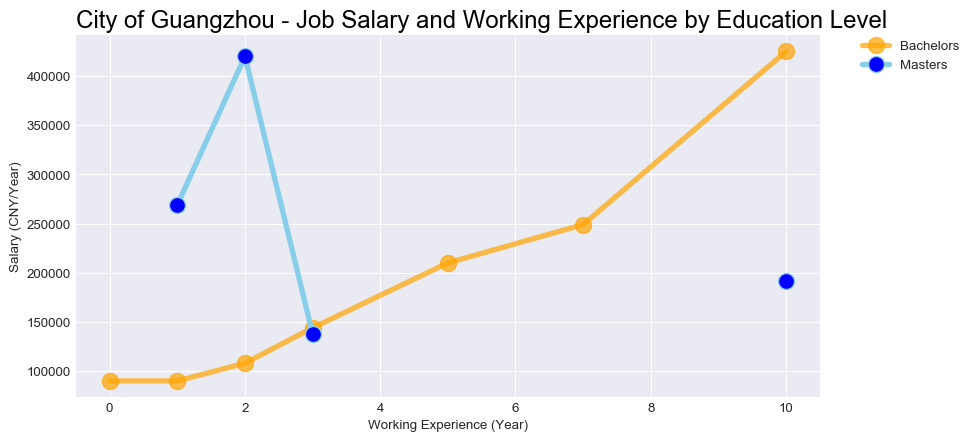

In [27]:
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(960/my_dpi, 480/my_dpi), dpi=my_dpi)
 
plt.plot(guangzhou_salary_1['index'], guangzhou_salary_1['salary'],
         marker='o', markerfacecolor='orange', markersize=12, color='orange', alpha = 0.7, linewidth=4,
        label='Bachelors')
plt.plot(guangzhou_salary_1['index'], guangzhou_salary_1['salary_Master'],
         marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,
        label='Masters')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Add titles
plt.title("City of Guangzhou - Job Salary and Working Experience by Education Level", loc='left', fontsize=18, fontweight=0, color='black')
plt.xlabel("Working Experience (Year)")
plt.ylabel("Salary (CNY/Year)")

In [28]:
# make a new df to cululate the popularity of different company_area
shanghai_salary_1 = pd.pivot_table(df_shanghai_1, values='salary', index=['workingexp'],
                       aggfunc=np.median)
shanghai_salary_2 = pd.pivot_table(df_shanghai_2, values='salary', index=['workingexp'],
                       aggfunc=np.median)
#set pivot table to regular table(assign the current index 'company_area' to column and 
#add a new index) 
shanghai_salary_1 = shanghai_salary_1.reset_index()
shanghai_salary_2 = shanghai_salary_2.reset_index()

# combine bachelor and master's salary
shanghai_salary_1['salary_Master'] = shanghai_salary_2['salary']
shanghai_salary_1['index'] = [10,1,2,3,5,8,0]
# sort the df for plotting 
shanghai_salary_1= shanghai_salary_1.sort_values(by='index')
shanghai_salary_1

,workingexp,salary,salary_Master,index
6,无工作经验,108000.0,108000.0,0
1,1年经验,108000.0,150000.0,1
2,2年经验,138000.0,210000.0,2
3,3-4年经验,180000.0,275000.0,3
4,5-7年经验,240000.0,241500.0,5
5,8-9年经验,300000.0,650000.0,8
0,10年以上经验,390000.0,495000.0,10


Text(0, 0.5, 'Salary (CNY/Year)')

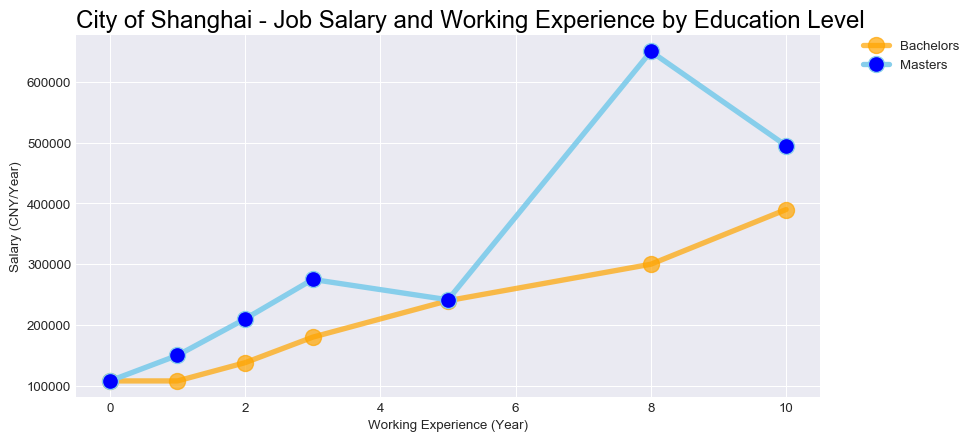

In [29]:
# plot for shanghai
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(960/my_dpi, 480/my_dpi), dpi=my_dpi)
 
plt.plot(shanghai_salary_1['index'], shanghai_salary_1['salary'],
         marker='o', markerfacecolor='orange', markersize=12, color='orange', alpha = 0.7, linewidth=4,
        label='Bachelors')
plt.plot(shanghai_salary_1['index'], shanghai_salary_1['salary_Master'],
         marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,
        label='Masters')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Add titles
plt.title("City of Shanghai - Job Salary and Working Experience by Education Level", 
          loc='left', fontsize=18, fontweight=0, color='black')
plt.xlabel("Working Experience (Year)")
plt.ylabel("Salary (CNY/Year)")

In [30]:
# for city beijing
beijing_salary_1 = pd.pivot_table(df_beijing_1, values='salary', index=['workingexp'],
                       aggfunc=np.median)
beijing_salary_2 = pd.pivot_table(df_beijing_2, values='salary', index=['workingexp'],
                       aggfunc=np.median)
#set pivot table to regular table(assign the current index 'company_area' to column and 
#add a new index) 
beijing_salary_1 = beijing_salary_1.reset_index()
beijing_salary_2 = beijing_salary_2.reset_index()

# combine bachelor and master's salary
beijing_salary_1['salary_Master'] = beijing_salary_2['salary']
beijing_salary_1['index'] = [10,1,2,3,5,8,0]
# sort the df for plotting 
beijing_salary_1= beijing_salary_1.sort_values(by='index')
beijing_salary_1

,workingexp,salary,salary_Master,index
6,无工作经验,108000.0,NaN,0
1,1年经验,108000.0,270000.0,1
2,2年经验,126000.0,150000.0,2
3,3-4年经验,180000.0,210000.0,3
4,5-7年经验,240000.0,345000.0,5
5,8-9年经验,300000.0,162000.0,8
0,10年以上经验,270000.0,144000.0,10


Text(0, 0.5, 'Salary (CNY/Year)')

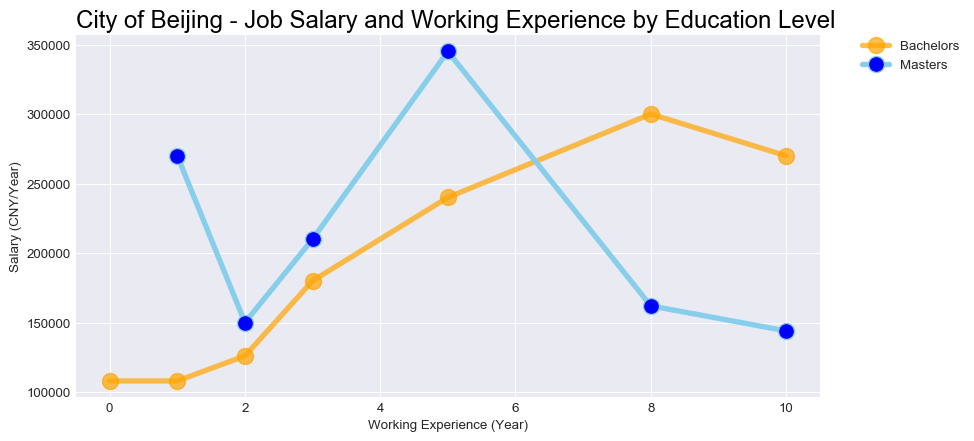

In [31]:
# plot for beijing
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(960/my_dpi, 480/my_dpi), dpi=my_dpi)
 
plt.plot(beijing_salary_1['index'], beijing_salary_1['salary'],
         marker='o', markerfacecolor='orange', markersize=12, color='orange', alpha = 0.7, linewidth=4,
        label='Bachelors')
plt.plot(beijing_salary_1['index'], beijing_salary_1['salary_Master'],
         marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,
        label='Masters')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Add titles
plt.title("City of Beijing - Job Salary and Working Experience by Education Level", 
          loc='left', fontsize=18, fontweight=0, color='black')
plt.xlabel("Working Experience (Year)")
plt.ylabel("Salary (CNY/Year)")